### Dataset acquired

Dataset reference:

- National Survey for Wales team (2014) ‘National Survey for Wales, 2013-14 - Transport’.

### Libraries imported

In [12]:
# import for handling tables and dataframes
import pandas as pd
# import for handling plots
import matplotlib.pyplot as plt
# import for improved visualisation, (plt extension)
import seaborn as sns

### Dataset import, and control checks

In [13]:
# importing the dataset
df = pd.read_excel("Transport 1314.xlsx", sheet_name="Table 2")
# first sense check to have a look at the imported table
df.head()

,"Table 2: Overall satisfaction with state of transport system in Wales, by have use of a car",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,Overall satisfaction with state of transport s...,NaN,NaN,NaN,NaN
2,NaN,NaN,Mean,NaN,Lower CI,NaN,Upper CI
3,Have use of a car,Yes,5.756477,NaN,5.671662,NaN,5.841292
4,NaN,No,6.371955,NaN,6.164324,NaN,6.579586


In [14]:
# info function providing overview of field types, length, dataset size, memory allocation etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Table 2: Overall satisfaction with state of transport system in Wales, by have use of a car  7 non-null      object 
 1   Unnamed: 1                                                                                   3 non-null      object 
 2   Unnamed: 2                                                                                   5 non-null      object 
 3   Unnamed: 3                                                                                   0 non-null      float64
 4   Unnamed: 4                                                                                   4 non-null      object 
 5   Unnamed: 5                             

### Missing values identified and handled, graphs visualised

In [4]:
# this function is written for tables 1-16 
# since visualisation is generalised for these tables, sometimes
# x-axis may not be entirely readable
def cleaning_and_vis_function_1(excelName, sheetName):
    
    # importing the dataset
    df = pd.read_excel(excelName, sheet_name=sheetName)
    #dropping rows with all null values - chosen strategy for handling nulls
    df.dropna(how="all", inplace=True)
    #dropping columns with all null values - chosen strategy for handling nulls
    df.dropna(axis=1, how="all", inplace=True)
    # saving into a variable name of the categorical variables
    categorical_name = df.iloc[2,0]
    # saving chart title into a variable
    chart_title = df.columns[0]
    # saving column names into variables
    mean = df.iloc[1,2]
    lower_ci = df.iloc[1,3]
    upper_ci = df.iloc[1,4]
    # renaming columns based on the saved variables
    df.rename(columns={"Unnamed: 1" : categorical_name,
    "Unnamed: 2" : mean, "Unnamed: 4" : lower_ci, "Unnamed: 6" : upper_ci},
    inplace=True)
    df = df.iloc[:,1:]
    # re-dropping rows with all null values to achieve a clean table
    df.dropna(how='any', inplace=True)

    # this is implementation of the bar plot in line with Data Analytics Report
    sns.barplot(x=categorical_name,
            y=mean,
            data=df)

    plt.xlabel(categorical_name)
    plt.ylabel(mean)
    plt.title(chart_title)
    # Show the plot
    plt.show()

    return df

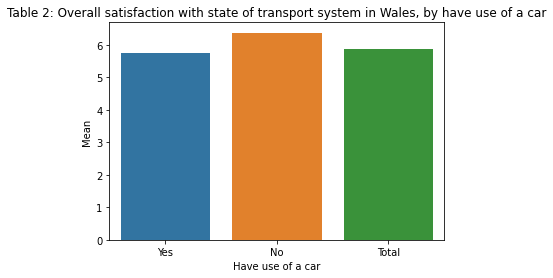

In [5]:
# this is example usage of the function above that not only displays a chart
# but also assignes clean and ready to use dataframe for further analysis
df = cleaning_and_vis_function_1("Transport 1314.xlsx", "Table 2")

In [6]:
# this function is written for tables 17-22
# since visualisation is generalised for these tables, sometimes
# x-axis may not be entirely readable
def cleaning_and_vis_function_2(excelName, sheetName, yesOrNo="yes"):
    
    # if-else statement to select appropriate column for the y-axis
    # as well as to raise an error when input is wrong
    if yesOrNo == "yes" or yesOrNo == "Yes":
        yesOrNo = "Yes (%)"
    elif yesOrNo == "no" or yesOrNo == "No":
        yesOrNo = "No (%)"
    else:
        raise ValueError(f'Function accepts only yes/no or "Yes/No input. "{yesOrNo}" was provided instead.')
    
    df = pd.read_excel(excelName, sheet_name=sheetName)
    #dropping rows with all null values - chosen strategy for handling nulls
    df.dropna(how="all", inplace=True)
    #dropping columns with all null values - chosen strategy for handling nulls
    df.dropna(axis=1, how="all", inplace=True)
    # saving into a variable name of the categorical variables
    categorical_name = df.iloc[3,0]
    # saving chart title into a variable
    chart_title = df.columns[0]
    # saving column names into variables
    lower_ci_yes = df.iloc[2,3]
    upper_ci_yes = df.iloc[2,4]
    lower_ci_no = df.iloc[2,6]
    upper_ci_no = df.iloc[2,7]
    # # renaming columns based on the saved variables
    df.rename(columns={"Unnamed: 1" : categorical_name,
    "Unnamed: 2" : "Yes (%)", "Unnamed: 8" : "No (%)", "Unnamed: 4" : lower_ci_yes,
    "Unnamed: 6" : upper_ci_yes, "Unnamed: 10" : lower_ci_no, "Unnamed: 12" : upper_ci_no},
    inplace=True)
    df = df.iloc[:,1:]
    # re-dropping rows with all null values to achieve a clean table
    df.dropna(how='any', inplace=True)

    # this is implementation of the line plot in line with Data Analytics Report
    sns.lineplot(data=df, x=categorical_name, y=yesOrNo).set(title=chart_title)

    return df

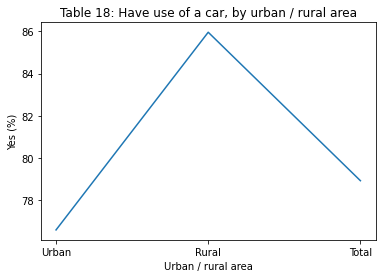

In [7]:
# this is example usage of the function above that not only displays a chart
# but also assignes clean and ready to use dataframe for further analysis
df = cleaning_and_vis_function_2("Transport 1314.xlsx", "Table 18", "yes")

### Key tables analysis

Problem 1: Rural public transport needs improvement

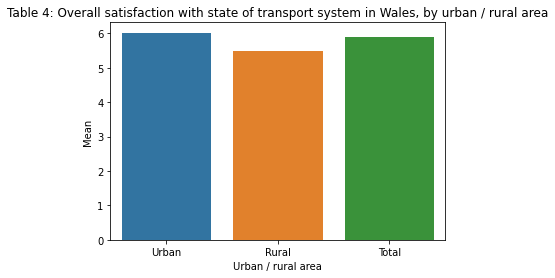

In [8]:
table4 = cleaning_and_vis_function_1("Transport 1314.xlsx", "Table 4")

As we can clearly see, satisfaction with public transport is much lower in Rural areas

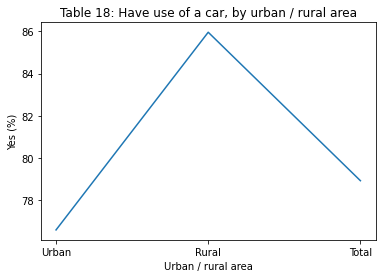

In [9]:
table18 = cleaning_and_vis_function_2("Transport 1314.xlsx", "Table 18", "yes")

Interestingly enough people in Rural areas have higher access to car, which could indicate they are less dependant on public transport

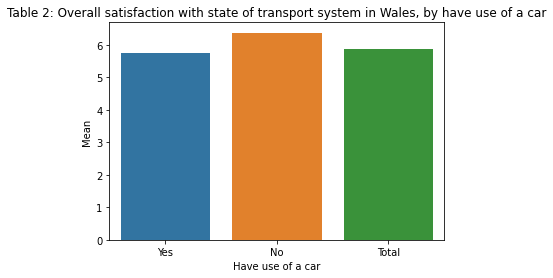

In [10]:
table4 = cleaning_and_vis_function_1("Transport 1314.xlsx", "Table 2")

However Table 2 clearly shows that people with access to car have lower satisfaction score with the public transport

Problem 2: People in employment have higher access to car, hence are less satisfied with public transport

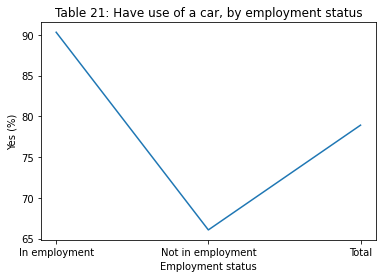

In [11]:
table21 = cleaning_and_vis_function_2("Transport 1314.xlsx", "Table 21", "yes")

- Question: why then people with higher access to cars in rural areas are less satisfied with public transportation?

- Hypothesis: People would like to be able to use public transport more often instead of polluting the air and spending money on expensive fuel; people without access to car have simply no alternative and hence are fairly happy with existing state of things, while car owners have higher expectations

- Recommendation: Public Transportation, especially in areas shall be improved, more connections built in order to increase public's satisfaction with public transport as well as decrease air pollution